# Decision Tree - Classification

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder


In [2]:
data_for_model = pickle.load(open("C:/Users/vatsal/Desktop/machine learning/model builidng/data/abc_classification_modelling.p", "rb"))
data_for_model

,customer_id,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,74,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,524,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,607,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,343,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,322,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...,...
855,372,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,104,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,393,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,373,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [3]:
data_for_model.drop("customer_id", axis =1, inplace=True)
data_for_model

,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
0,1,3.38,F,0.59,1586.89,195,26,5,61.034231
1,1,4.76,F,0.52,2397.26,258,27,5,88.787407
2,1,4.45,F,0.49,1279.91,183,22,5,58.177727
3,0,0.91,M,0.54,967.14,102,17,5,56.890588
4,1,3.02,F,0.63,1566.35,182,30,5,52.211667
...,...,...,...,...,...,...,...,...,...
855,1,4.38,F,0.50,1381.28,103,12,5,115.106667
856,1,2.36,F,0.63,1464.62,127,22,5,66.573636
857,1,1.87,M,0.59,2213.97,191,38,5,58.262368
858,0,0.21,M,0.47,1446.00,133,22,5,65.727273


In [4]:
#shuffle data
data_for_model = shuffle(data_for_model, random_state = 42)

In [5]:
#Class Balance

data_for_model["signup_flag"].value_counts(normalize=True)

0    0.689535
1    0.310465
Name: signup_flag, dtype: float64

In [6]:
data_for_model.dropna(how="any", inplace=True)
data_for_model

C:\Users\vatsal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,signup_flag,distance_from_store,gender,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value
714,0,1.64,M,0.58,27.81,6,3,3,9.270000
605,0,0.88,M,0.63,26.62,9,3,2,8.873333
120,0,0.56,M,0.62,886.78,154,18,4,49.265556
208,0,0.11,M,0.58,1256.19,168,34,5,36.946765
380,0,1.32,M,0.36,739.67,110,21,3,35.222381
...,...,...,...,...,...,...,...,...,...
71,0,0.07,M,0.57,746.15,133,24,5,31.089583
106,0,1.96,F,0.60,881.49,166,24,4,36.728750
270,0,1.59,M,0.50,319.37,85,17,5,18.786471
435,0,0.71,F,0.54,273.94,74,20,4,13.697000


In [7]:
#split input variables & output variables

X = data_for_model.drop(["signup_flag"], axis = 1)
y = data_for_model["signup_flag"]
X, y

(     distance_from_store gender  credit_score  total_sales  total_items  \
 714                 1.64      M          0.58        27.81            6   
 605                 0.88      M          0.63        26.62            9   
 120                 0.56      M          0.62       886.78          154   
 208                 0.11      M          0.58      1256.19          168   
 380                 1.32      M          0.36       739.67          110   
 ..                   ...    ...           ...          ...          ...   
 71                  0.07      M          0.57       746.15          133   
 106                 1.96      F          0.60       881.49          166   
 270                 1.59      M          0.50       319.37           85   
 435                 0.71      F          0.54       273.94           74   
 102                 2.60      F          0.48       523.41           89   
 
      transaction_count  product_area_count  average_basket_value  
 714              

In [8]:
#split out Training & test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify= y)

In [9]:
#deal with categorical variables

categorical_vars = ["gender"]

one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

X_train_encoded = one_hot_encoder.fit_transform(X_train[categorical_vars])
X_test_encoded = one_hot_encoder.transform(X_test[categorical_vars])

encoder_feature_names = one_hot_encoder.get_feature_names(categorical_vars)

X_train_encoded = pd.DataFrame(X_train_encoded, columns = encoder_feature_names)
X_train = pd.concat([X_train.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis = 1)
X_train.drop(categorical_vars, axis =1, inplace = True)

X_test_encoded = pd.DataFrame(X_test_encoded, columns = encoder_feature_names)
X_test = pd.concat([X_test.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis = 1)
X_test.drop(categorical_vars, axis =1, inplace = True)
X_train

C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,distance_from_store,credit_score,total_sales,total_items,transaction_count,product_area_count,average_basket_value,gender_M
0,1.22,0.60,636.51,123,22,5,28.932273,0.0
1,0.86,0.56,1141.28,112,21,5,54.346667,1.0
2,1.23,0.79,1207.42,210,26,4,46.439231,1.0
3,1.04,0.40,78.18,11,3,2,26.060000,1.0
4,0.07,0.62,740.51,94,24,5,30.854583,1.0
...,...,...,...,...,...,...,...,...
672,0.95,0.45,714.06,135,29,5,24.622759,0.0
673,3.85,0.58,1357.93,210,20,3,67.896500,0.0
674,1.51,0.67,958.23,160,26,5,36.855000,1.0
675,4.49,0.43,1531.61,135,24,5,63.817083,0.0


In [10]:
#Model Training
clf= DecisionTreeClassifier(random_state = 42, max_depth = 5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [11]:
#Model assessment
y_pred_class = clf.predict(X_test)

y_pred_prob = clf.predict_proba(X_test)[:,1]

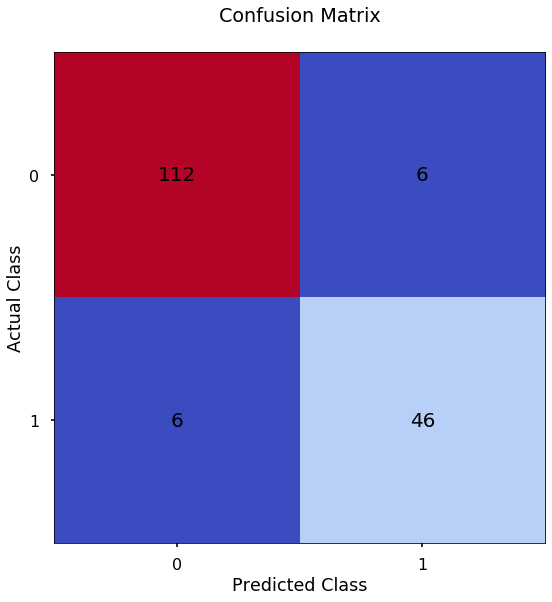

In [12]:
# Confusion maxtrix

conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-poster")
plt.matshow(conf_matrix, cmap = "coolwarm")
plt.gca().xaxis.tick_bottom()
plt.title("Confusion Matrix")
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value,ha="center", va="center", fontsize=20)
plt.show()

In [13]:
#Accuracy(number of correct classification out of all attempted classfications)

accuracy_score(y_test, y_pred_class)

0.9294117647058824

In [14]:
#Precision(of all observations that were predicted as positive, how many are actually positive)

precision_score(y_test, y_pred_class)

0.8846153846153846

In [15]:
#Recall(of all positive observations how many did we predict as positive)
recall_score(y_test, y_pred_class)

0.8846153846153846

In [16]:
# F1-Score(the harmonic mean of precision and recall)
f1_score(y_test, y_pred_class)

0.8846153846153846

In [17]:
# Finding the best max_depth

max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    clf = DecisionTreeClassifier(max_depth = depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

In [18]:
accuracy_scores

[0.6857142857142856,
 0.7741935483870966,
 0.8347826086956522,
 0.7659574468085107,
 0.8846153846153846,
 0.9056603773584906,
 0.9038461538461539,
 0.8846153846153846,
 0.9245283018867925,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953,
 0.8952380952380953]

In [19]:
max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]
max_accuracy, optimal_depth, max_accuracy_idx


(0.9245283018867925, 9, 8)

<function matplotlib.pyplot.show(*args, **kw)>

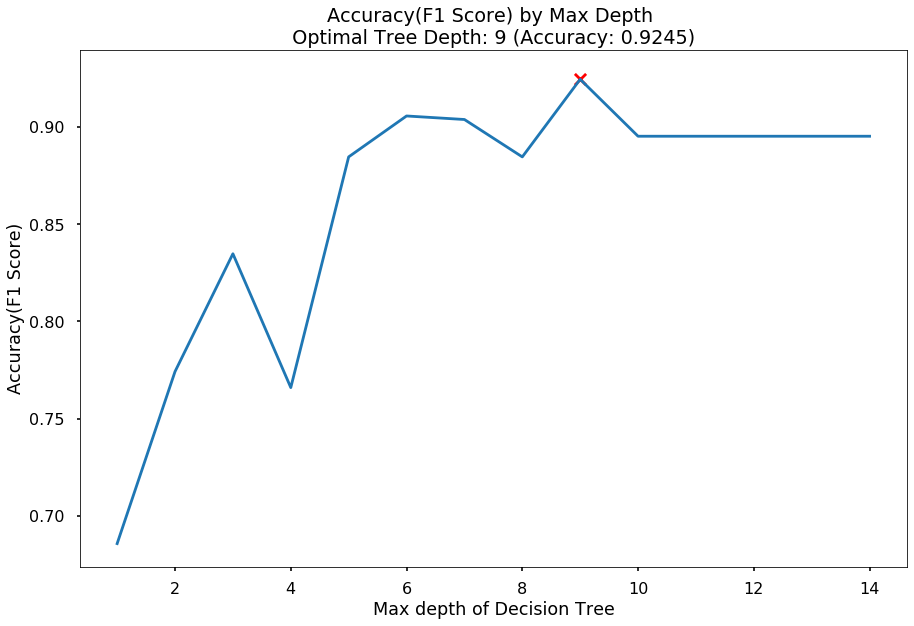

In [20]:
# Plot of max depth

plt.plot(max_depth_list, accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = "x", color="red")
plt.title(f"Accuracy(F1 Score) by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy: {round(max_accuracy, 4)}) ")
plt.xlabel("Max depth of Decision Tree")
plt.ylabel("Accuracy(F1 Score)")
plt.tight_layout()
plt.show

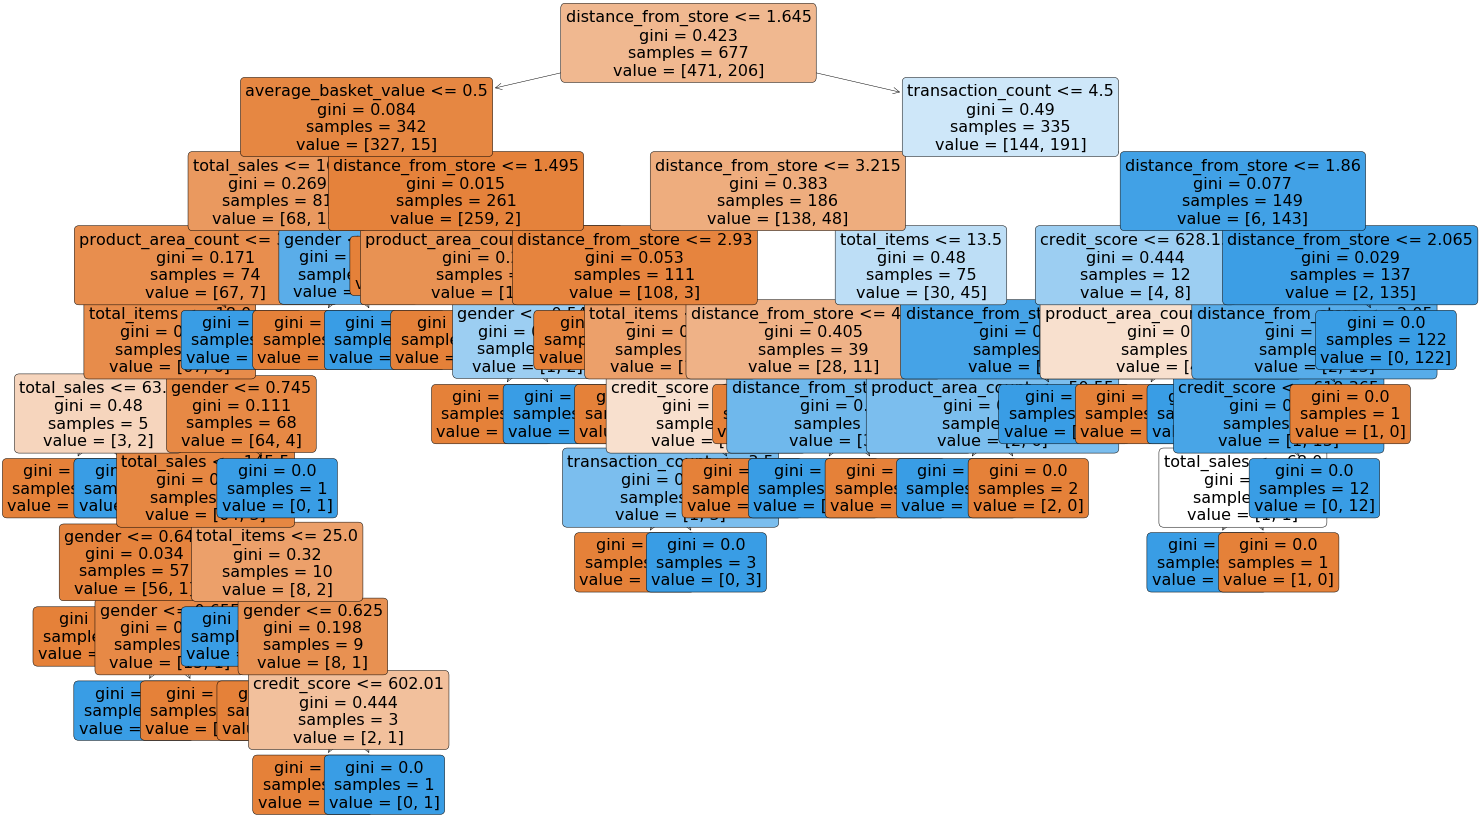

In [21]:
# Plot our Model

plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names = X.columns,
                 filled=True,
                 rounded=True,
                 fontsize=16)